## Przedstawienie wyników różnych algorytmów poleceń dla wybranego użytkownika

In [1]:
import pandas as pd
import clustering as cl
import knn as knn_alg
import factorization as mf
import matplotlib.pyplot as plt

In [2]:
# Import datasetu
movies = pd.read_csv('data/movie.csv')
ratings = pd.read_csv('data/rating.csv')
genome = pd.read_csv('data/genome_tags.csv')

In [26]:
# wybór użytkownika, dla którego będziemy polecać filmy, oraz ile filmów chcemy wyświetlić
user_id = 902
number_of_movies = 10

## Metoda klasteryzacji algorytmem k-średnich

In [11]:
# Tworzenie klastrów może zająć do około minuty
RS = cl.SystemRekomendacji(ratings, movies)
RS.prepare_clusters()

Termination criterion satisfied


True

In [30]:
recommended_movies = RS.recommend_movies(number_of_movies, user_id)
recommended_movies

,title
0,Paths of Glory (1957)
1,Rashomon (Rashômon) (1950)
2,Once Upon a Time in the West (C'era una volta ...
3,"Lady Eve, The (1941)"
4,My Man Godfrey (1936)
5,"Lion in Winter, The (1968)"
6,Laura (1944)
7,You Can Count on Me (2000)
8,Nausicaä of the Valley of the Wind (Kaze no ta...
9,Ninotchka (1939)


## KNN - k Nearest Neighbors

In [31]:
movie_details_df = pd.DataFrame(columns=['movieId', 'title', 'genres'])
movie_recommender = knn_alg.MovieRecommender(movies, ratings)
movie_ids_list = movie_recommender.recommend_movies(user_id, number_of_movies, False)

rows_to_append = []
for arr in movie_ids_list:
    for movie_id in arr:
        movie_row = movies[movies['movieId'] == movie_id]
        if not movie_row.empty:
            rows_to_append.append(movie_row.iloc[0])

if rows_to_append:
    movie_details_df = pd.concat([movie_details_df, pd.DataFrame(rows_to_append)], ignore_index=True)

movie_details_df

Maximum rating for user 902 : 5.0
Movies with the maximum rating: [141, 318, 356, 527, 1097, 1188, 1213, 2571, 2959, 2997, 3147, 6942, 7361, 8874, 44191, 44665, 60069, 68157]


,movieId,title,genres
0,62,Mr. Holland's Opus (1995),Drama
1,736,Twister (1996),Action|Adventure|Romance|Thriller
2,708,"Truth About Cats & Dogs, The (1996)",Comedy|Romance
3,95,Broken Arrow (1996),Action|Adventure|Thriller
4,36,Dead Man Walking (1995),Crime|Drama
5,608,Fargo (1996),Comedy|Crime|Drama|Thriller
6,539,Sleepless in Seattle (1993),Comedy|Drama|Romance
7,25,Leaving Las Vegas (1995),Drama|Romance
8,788,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi
9,39,Clueless (1995),Comedy|Romance


## Matrix factorization

In [27]:
number_of_ratings = 1000000
matrix_factorization = mf.MatrixFactorization(ratings.head(number_of_ratings), 1, 5, movies, 20, genome.shape[0])

In [28]:
mf_recomended_movies = matrix_factorization.get_recomendations(user_id, number_of_movies)

mf_movie_details_df = pd.DataFrame(columns=['movieId', 'title', 'genres'])
movie_ids_list = [item[0] for item in mf_recomended_movies]

rows_to_append = []
for movie_id in movie_ids_list:
    movie_row = movies[movies['movieId'] == movie_id]
    if not movie_row.empty:
        rows_to_append.append(movie_row.iloc[0])

if rows_to_append:
    mf_movie_details_df = pd.concat([mf_movie_details_df, pd.DataFrame(rows_to_append)], ignore_index=True)

mf_movie_details_df

,movieId,title,genres
0,24,Powder (1995),Drama|Sci-Fi
1,1078,Bananas (1971),Comedy|War
2,1353,"Mirror Has Two Faces, The (1996)",Comedy|Drama|Romance
3,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
4,57,Home for the Holidays (1995),Drama
5,1305,"Paris, Texas (1984)",Drama|Romance
6,1611,My Own Private Idaho (1991),Drama|Romance
7,841,"Eyes Without a Face (Yeux sans visage, Les) (1...",Horror
8,2568,"Mod Squad, The (1999)",Action|Crime


## Porównanie zwróconych wyników

In [17]:
import matplotlib.pyplot as plt
def genre_graph_plot(recommended_movies):
    # Łączymy ramki danych na podstawie tytułów filmów
    merged_df = pd.merge(movies, recommended_movies, on='title', how='inner')

    # Grupujemy po gatunkach i liczymy wystąpienia każdego gatunku
    genres_counts = movies[movies['title'].isin(merged_df['title'])]['genres'].str.split('|', expand=True).stack().value_counts()

    # Tworzymy wykres słupkowy
    plt.figure(figsize=(10, 6))
    plt.bar(genres_counts.keys(), genres_counts.values, color='skyblue')
    plt.xlabel('Gatunki filmów')
    plt.ylabel('Liczba wystąpień')
    plt.title('Najczęściej występujące gatunki filmów')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

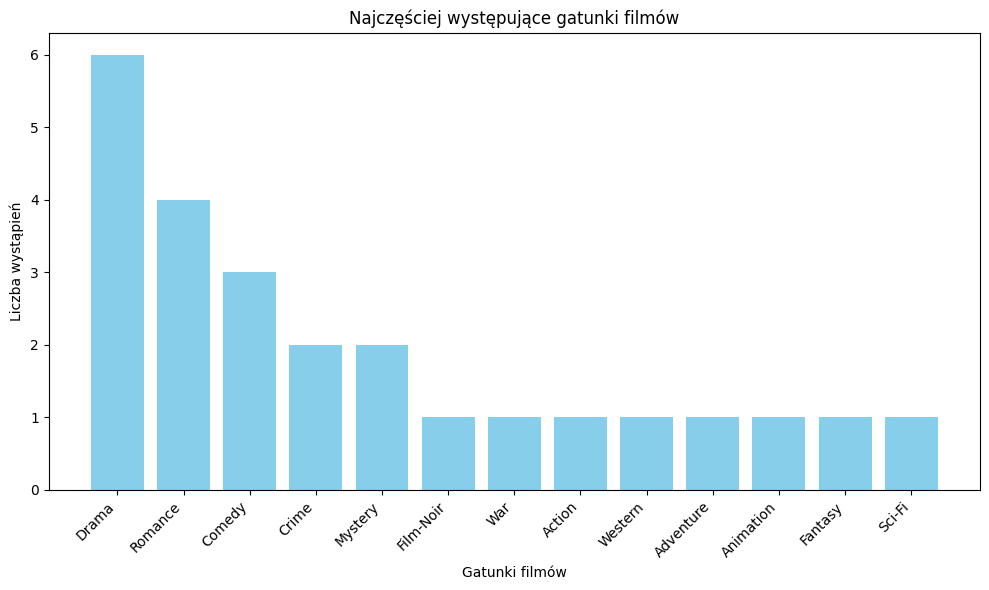

In [18]:
genre_graph_plot(recommended_movies)

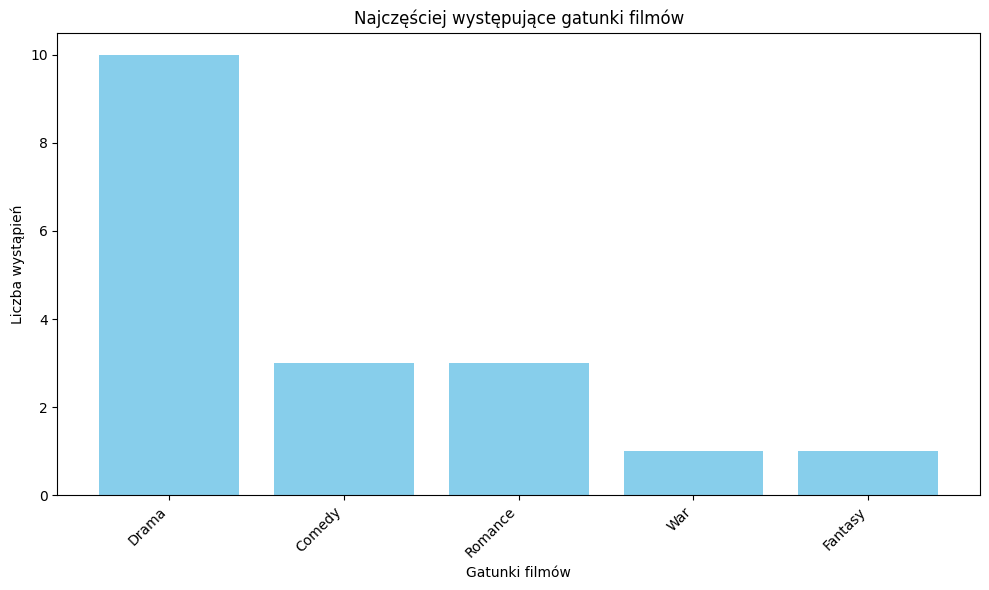

In [9]:
genre_graph_plot(movie_details_df)

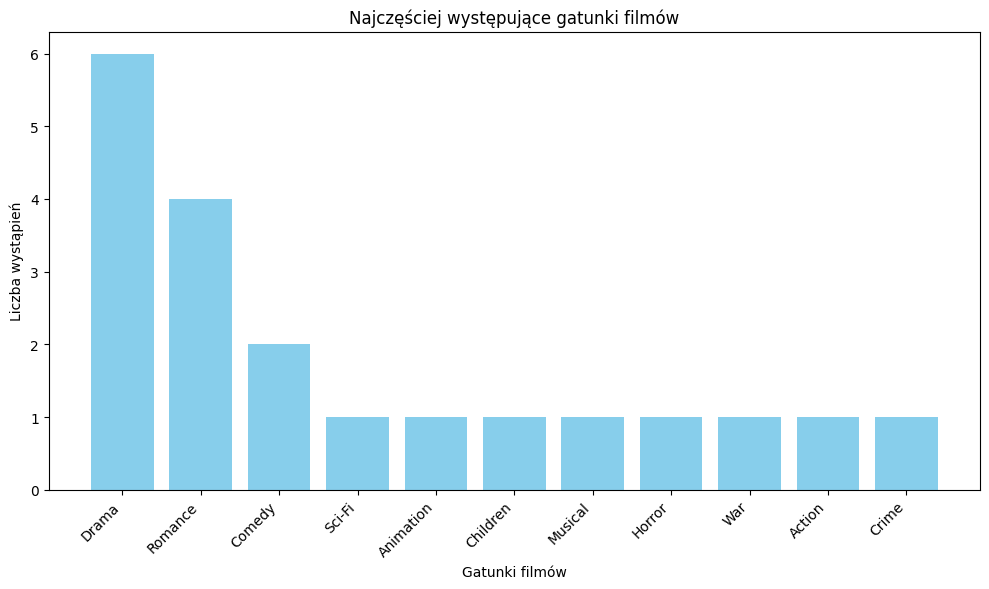

In [29]:
genre_graph_plot(mf_movie_details_df)